# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [5]:
# If on colab, uncomment the following lines

#! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
# import opendatasets as od
# od.download("https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv")

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import collections
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [3]:
# drop column '0'
dataset.drop(columns = 0, inplace = True)
data = dataset.values[:, :-1].astype(int)
target = dataset.values[:, -1]

print(data.shape, target.shape)

(846, 18) (846,)


Make a target distribution plot to find out the classes balance

Counter({'bus': 218, 'saab': 217, 'opel': 212, 'van': 199})


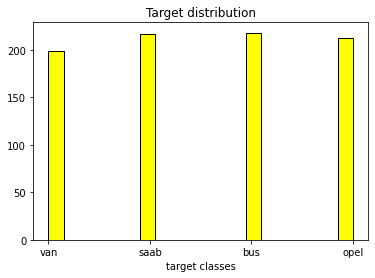

In [4]:
# target distribution
def plot_hist_target(y, name=None):
    plt.hist(y, color='yellow', edgecolor='black', bins=20)
    plt.title('Target distribution')
    if name is not None:
        plt.xlabel(name)
    plt.show()
    
print(collections.Counter(target))    
plot_hist_target(target, 'target classes')

Let us target convert to int type

In [5]:
dataset.iloc[:, -1].replace(['van', 'saab', 'bus', 'opel'],
                            [0, 1, 2, 3], inplace=True)
target_label = dataset.iloc[:, -1]
target_label

0      0
1      0
2      1
3      0
4      2
      ..
841    1
842    0
843    1
844    1
845    0
Name: 19, Length: 846, dtype: int64

Look at feature correlation using corr_matrix

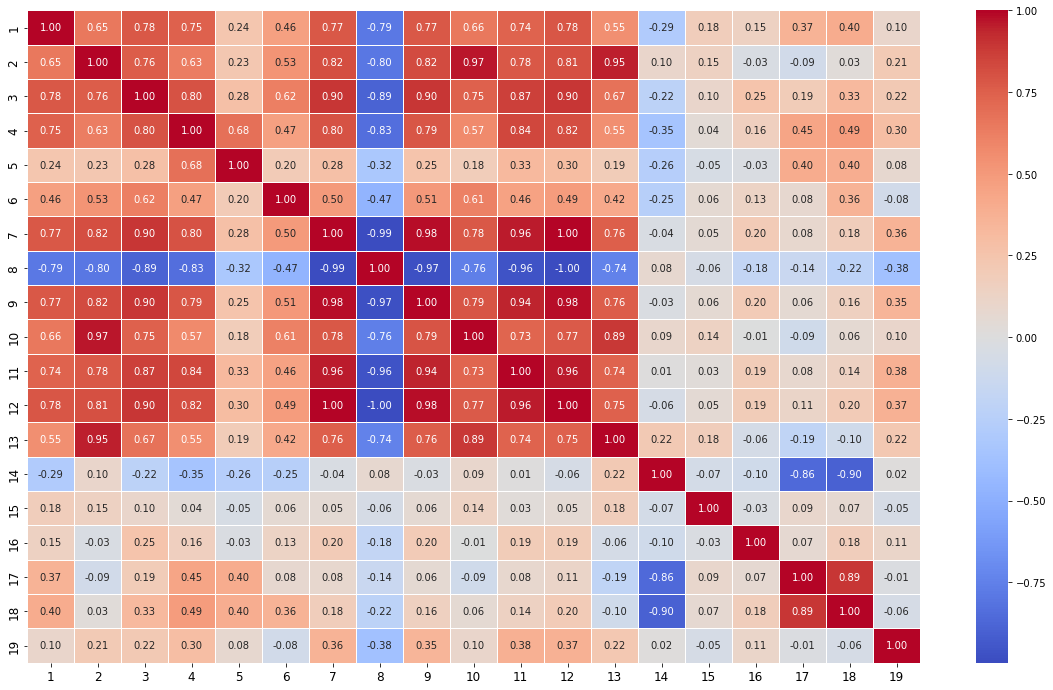

In [6]:
corr_matrix = dataset.corr(method='spearman')
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.8,
             cmap='coolwarm', ax=ax)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As we can see there are high correlation between some features. For example, 2 with 10 and 13. Also it should be noted that target has not high correlation with features.

In [221]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(data, target_label, test_size=0.35, random_state = random_state)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 18) (549,) (297, 18) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [8]:
X_train_pd = pd.DataFrame(X_train, columns = dataset.columns[:-1])

# First 15 rows of our dataset.
X_train_pd.head(15)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Methods `describe` and `info` deliver some useful information.

In [9]:
X_train_pd.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [10]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       549 non-null    int32
 1   2       549 non-null    int32
 2   3       549 non-null    int32
 3   4       549 non-null    int32
 4   5       549 non-null    int32
 5   6       549 non-null    int32
 6   7       549 non-null    int32
 7   8       549 non-null    int32
 8   9       549 non-null    int32
 9   10      549 non-null    int32
 10  11      549 non-null    int32
 11  12      549 non-null    int32
 12  13      549 non-null    int32
 13  14      549 non-null    int32
 14  15      549 non-null    int32
 15  16      549 non-null    int32
 16  17      549 non-null    int32
 17  18      549 non-null    int32
dtypes: int32(18)
memory usage: 38.7 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Since feature values have different scale we normalize it by StandardScaler

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), list(range(X_train.shape[1]) ) )
    ])

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

Accuracy: 0.8013468013468014
Precision: 0.8013468013468014
Recall: 0.8013468013468014
F1: 0.8013468013468014


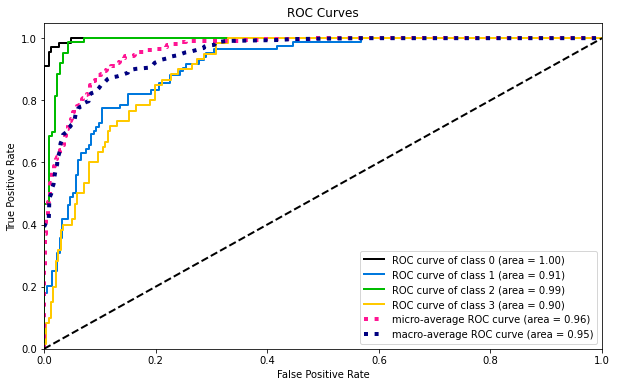

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scikitplot as skplt

plt.rcParams["figure.figsize"] = (10,6)

def print_res(y_test, answers_pred, answers_probas):
    print(f'Accuracy: {accuracy_score(y_test, answers_pred)}')
    print(f'Precision: {precision_score(y_test, answers_pred, average="micro")}')
    print(f'Recall: {recall_score(y_test, answers_pred, average="micro")}')
    print(f'F1: {f1_score(y_test, answers_pred, average="micro")}')
    skplt.metrics.plot_roc(y_test, answers_probas)

log_pipe = Pipeline([
    ('transformer', ct),
    ('clf', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, 
                               max_iter=500, random_state = random_state))
])
log_pipe.fit(X_train,y_train)
prediction_log = log_pipe.predict(X_test)
prediction_log_probas = log_pipe.predict_proba(X_test)

print_res(y_test, prediction_log, prediction_log_probas)

Try to find optimal hyperparameters for LogReg 

In [13]:
from sklearn.model_selection import GridSearchCV


parameters = {
              'clf__multi_class': ['multinomial'],
              'clf__solver':['saga', 'newton-cg', 'lbfgs', 'sag'],
              'clf__tol':[1e-4, 1e-3], 
              'clf__max_iter': [100, 300, 500, 700]
             }
log_grid = GridSearchCV(log_pipe, parameters)
log_grid.fit(X_train, y_train) 
log_grid.best_params_

{'clf__max_iter': 100,
 'clf__multi_class': 'multinomial',
 'clf__solver': 'sag',
 'clf__tol': 0.0001}

Accuracy: 0.8013468013468014
Precision: 0.8013468013468014
Recall: 0.8013468013468014
F1: 0.8013468013468014


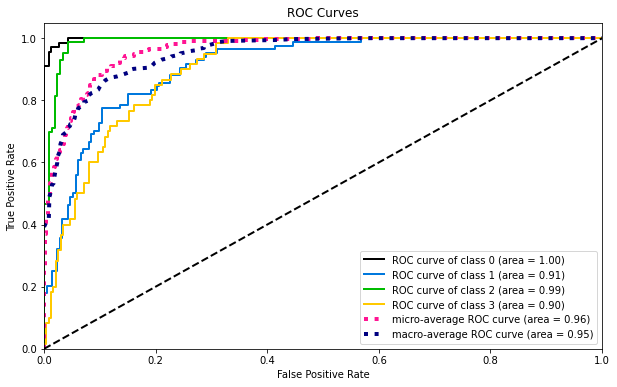

In [270]:
prediction_log = log_grid.best_estimator_.predict(X_test)
prediction_log_probas = log_grid.best_estimator_.predict_proba(X_test)
print_res(y_test, prediction_log, prediction_log_probas)

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [15]:
from sklearn.decomposition import PCA

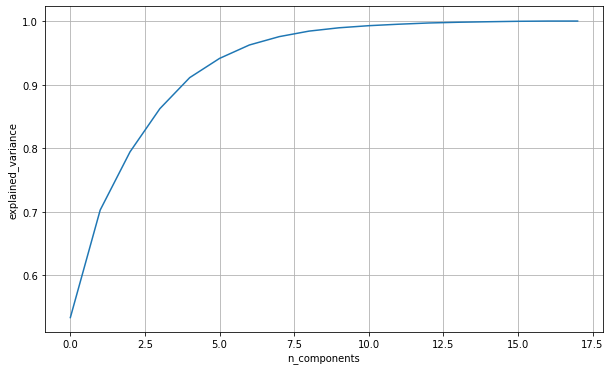

In [16]:
pipe = Pipeline([
    ('transformer', ct),
    ('pca', PCA())
])
X_train_pca = pipe.fit_transform(X_train)
plt.plot(np.cumsum(pipe['pca'].explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('explained_variance')
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

From the plot above we can see that 12 components explains almost 100% of variance, so take 12 components

In [17]:
n_components = 12

log_pipe_pca = Pipeline([
    ('transformer', ct),
    ('pca', PCA(n_components = n_components)),
    ('clf', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, random_state = random_state))
])

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Accuracy: 0.7676767676767676
Precision: 0.7676767676767676
Recall: 0.7676767676767676
F1: 0.7676767676767676


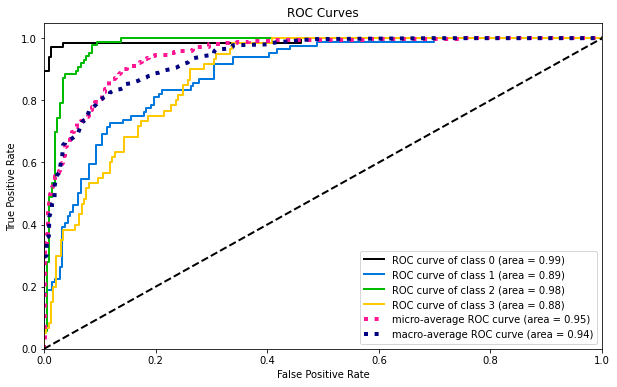

In [18]:
log_pipe_pca.fit(X_train, y_train)
prediction_log_pca = log_pipe_pca.predict(X_test)
prediction_log_pca_probas = log_pipe_pca.predict_proba(X_test)

print_res(y_test, prediction_log_pca, prediction_log_pca_probas)

Try to find optimal hyperparameters for LogReg with PCA

In [19]:
parameters = {
              'clf__multi_class': ['multinomial'],
              'clf__solver':['saga', 'newton-cg', 'lbfgs', 'sag'],
              'clf__tol':[1e-4, 1e-3], 
             }
log_grid_pca = GridSearchCV(log_pipe_pca, parameters)
log_grid_pca.fit(X_train, y_train) 
log_grid_pca.best_params_

{'clf__multi_class': 'multinomial',
 'clf__solver': 'newton-cg',
 'clf__tol': 0.0001}

Accuracy: 0.7676767676767676
Precision: 0.7676767676767676
Recall: 0.7676767676767676
F1: 0.7676767676767676


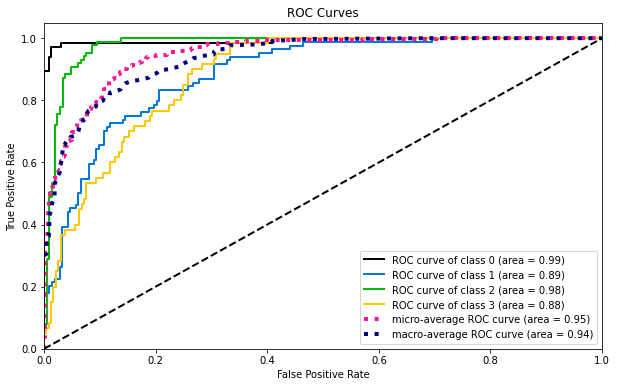

In [20]:
prediction_log_pca = log_grid_pca.best_estimator_.predict(X_test)
prediction_log_pca_probas = log_grid_pca.best_estimator_.predict_proba(X_test)
print_res(y_test, prediction_log_pca, prediction_log_pca_probas)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Accuracy: 0.7373737373737373
Precision: 0.7373737373737373
Recall: 0.7373737373737373
F1: 0.7373737373737375


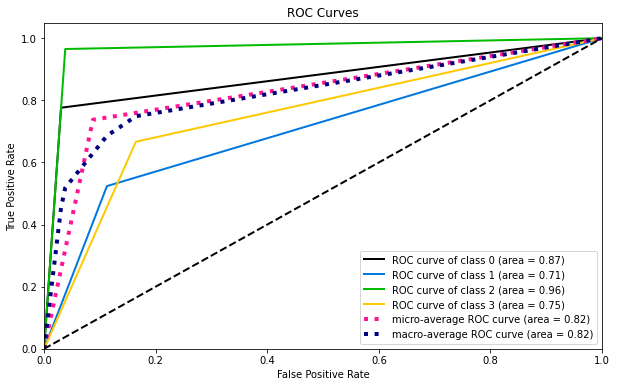

In [21]:
from sklearn.tree import DecisionTreeClassifier

# don`t use transformer, because trees usually don`t need it
tree_pipe = Pipeline([
    ('clf', DecisionTreeClassifier(random_state = random_state))
])
tree_pipe.fit(X_train, y_train)
prediction_tree = tree_pipe.predict(X_test)
prediction_tree_probas = tree_pipe.predict_proba(X_test)

print_res(y_test, prediction_tree, prediction_tree_probas)

In [22]:
parameters = {
              'clf__max_depth': list(range(2,10))
             }
tree_grid = GridSearchCV(tree_pipe, parameters)
tree_grid.fit(X_train, y_train) 
tree_grid.best_params_

{'clf__max_depth': 8}

Accuracy: 0.7239057239057239
Precision: 0.7239057239057239
Recall: 0.7239057239057239
F1: 0.7239057239057239


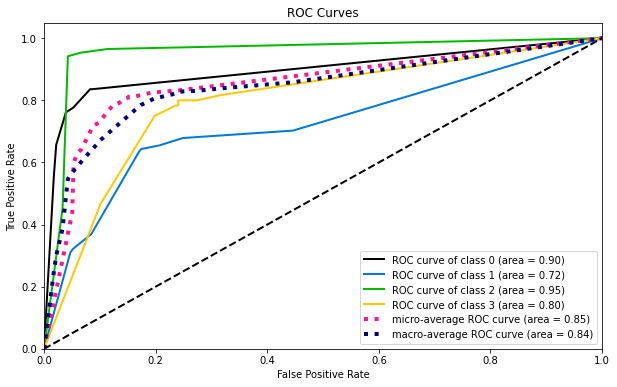

In [23]:
prediction_tree = tree_grid.best_estimator_.predict(X_test)
prediction_tree_probas = tree_grid.best_estimator_.predict_proba(X_test)
print_res(y_test, prediction_tree, prediction_tree_probas)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [264]:
X_train_pd[19] = y_train.values
X_train_pd.shape

(549, 19)

In [231]:
# generate 100 samples from initial dataset
# each sample have 300 objects
def bootstrap(data, n_trials = 100):
    index = np.arange(data.shape[0])
    num_objects = 300
    bootstrap_index = np.random.choice(index,
                                       size=num_objects*n_trials,
                                       replace=True)
    shape = (num_objects, data.shape[1])
    bootstrap_data = np.reshape(data[bootstrap_index,:],
                                (n_trials,*shape))
    return bootstrap_data

data_bootstrap = bootstrap(X_train_pd.values)

In [232]:
X_test.shape

(297, 18)

In [233]:
import random 


def bagging_function(dataset: np.ndarray, method: str):
    N = range(2, 100, 5)
    samples_num = data_bootstrap.shape[0]
    result_acc = {}
    result_f1 = {}
    if method == 'LogisticRegression': # pipe and parameters for LR
        pipe = Pipeline([
        ('transformer', ct),
        ('clf', LogisticRegression(random_state = random_state))
        ])
        parameters = {
              'clf__multi_class': ['multinomial'],
              'clf__solver':['saga', 'newton-cg', 'lbfgs', 'sag'],
              'clf__tol':[1e-4, 1e-3], 
              'clf__max_iter': [100, 300, 500, 700]
             }
    elif method == 'DecisionTree': # pipe and parameters for DT
        pipe = Pipeline([
        ('clf', DecisionTreeClassifier(random_state = random_state))
        ])
        parameters = {
          'clf__max_depth': [3, 5, 7, 10]
         }
    for alg_nums in N:
        prediction = []
        for _ in range(alg_nums): # training
            sample = random.randint(1, samples_num - 2) # choose a sample from dataset beside test sample
            X = dataset[sample][:, :-1]
            y = dataset[sample][:, -1]
            grid = GridSearchCV(pipe, parameters) # find best parameters
            grid.fit(X, y) 
            pred = grid.best_estimator_.predict_proba(X_test) # make prediction on test data
            prediction.append(pred)
        mean_pred = np.array(prediction).mean(axis=0) # get mean results
        pred_labels = np.argmax(mean_pred, axis=1)
        accuracy = accuracy_score(y_test, pred_labels)
        f1 = f1_score(y_test, pred_labels, average="micro")
        result_acc[alg_nums] = accuracy
        result_f1[alg_nums] = f1
    return result_acc, result_f1

In [265]:
acc_lr, f1_lr = bagging_function(data_bootstrap, 'LogisticRegression')

In [268]:
def plot_metrics(acc_d: dict, f1_d: dict):
    lists1 = sorted(acc_d.items())
    x1, y1 = zip(*lists1)
    lists2 = sorted(f1_d.items())
    x2, y2 = zip(*lists2)
    fig, (ax1, ax2) = plt.subplots(2)
    ax1.plot(x1, y1)
    ax1.set_title("Bootstrapped accuracy")
    ax2.plot(x2, y2)
    ax2.set_title("Bootstrapped F1 score")
    ax2.set_xlabel('number of models')
    fig.tight_layout()

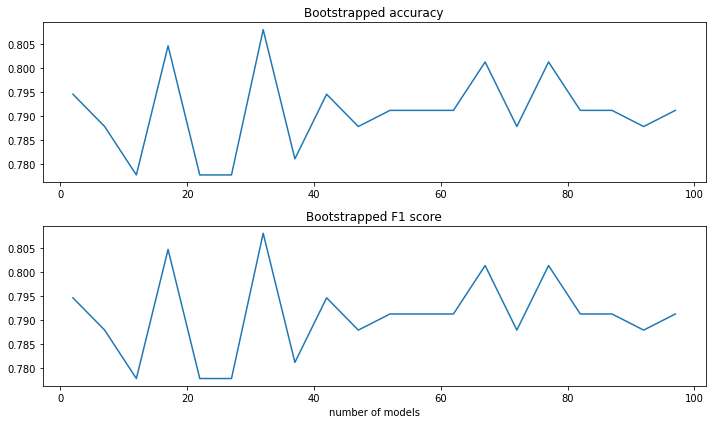

In [269]:
plot_metrics(acc_lr, f1_lr)

Maximum metric values: {32: 0.8080808080808081}

In [234]:
acc_dt, f1_dt = bagging_function(data_bootstrap, 'DecisionTree')

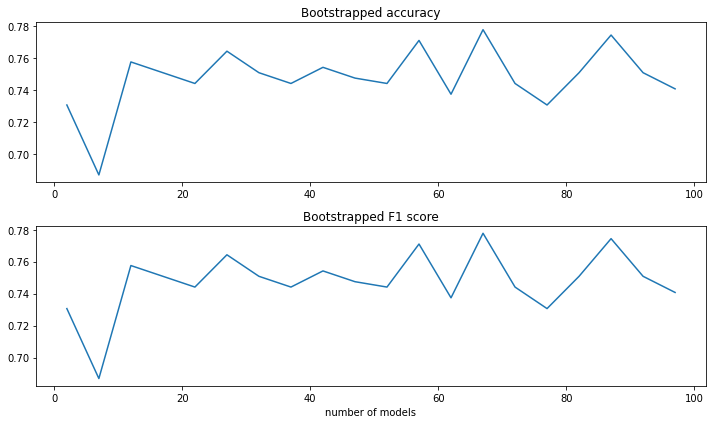

In [235]:
plot_metrics(acc_dt, f1_dt)

Maximum metric values: {67: 0.7777777777777778}

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Accuracy: 0.7643097643097643
Precision: 0.7643097643097643
Recall: 0.7643097643097643
F1: 0.7643097643097643


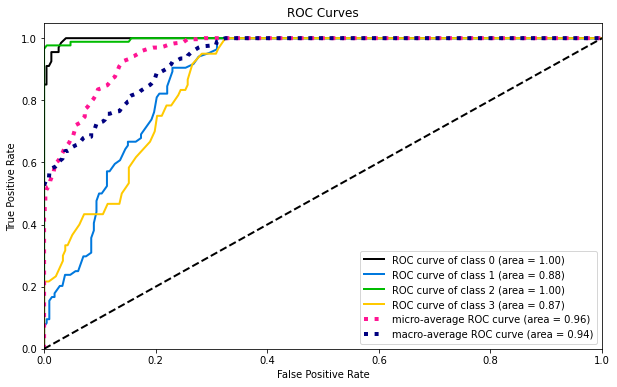

In [263]:
from sklearn.ensemble import RandomForestClassifier

forest_pipe = Pipeline([
    ('clf', RandomForestClassifier(random_state = random_state))
])
forest_pipe.fit(X_train, y_train)
pridiction_forest = forest_pipe.predict(X_test)
pridiction_forest_probas = forest_pipe.predict_proba(X_test)

print_res(y_test, pridiction_forest, pridiction_forest_probas)

In [261]:
parameters = {
              'clf__n_estimators': [10, 20, 30, 32, 40, 50, 67, 100],
              'clf__max_depth': [3, 5, 7, 10]
             }
forest_grid = GridSearchCV(forest_pipe, parameters, cv=3)
forest_grid.fit(X_train, y_train) 
forest_grid.best_params_

{'clf__max_depth': 7, 'clf__n_estimators': 67}

Accuracy: 0.7811447811447811
Precision: 0.7811447811447811
Recall: 0.7811447811447811
F1: 0.7811447811447811


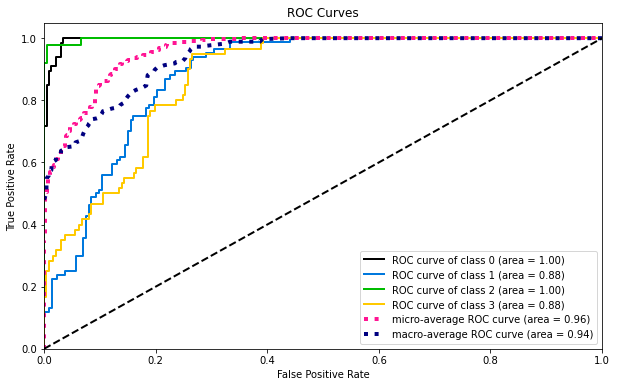

In [262]:
prediction_forest = forest_grid.best_estimator_.predict(X_test)
prediction_forest_probas = forest_grid.best_estimator_.predict_proba(X_test)
print_res(y_test, prediction_forest, prediction_forest_probas)

We can see that n_estimators in RF is almost the same that was in DT bagging. Optimal parameters that was received by gridsearch are equal to DT bagging parameters (n_estiamtors = num_of_models_DT = 67). The difference can be explained by: in RF only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging DT where all features are considered for splitting a node.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [274]:
dataset.shape

(846, 19)

In [275]:
# set 646 objects for train and 200 objects for test
train_df = dataset.values[:646].astype(int)
test_df = dataset.values[646:]

In [276]:
train_df.shape, test_df.shape

((646, 19), (200, 19))

In [281]:
def learning_curve(n_split :int = 10):
    chunk = 65
    result_acc = {
        'lr':[],
        'dt':[],
        'rf':[]
    }
    result_f1 = {
        'lr':[],
        'dt':[],
        'rf':[]
    }
    # pipe for LR
    pipe_lr = Pipeline([
        ('transformer', ct),
        ('clf', LogisticRegression(max_iter = 100, multi_class = 'multinomial', 
                                   solver = 'sag', tol = 1e-4, random_state = random_state))
    ])
    # pipe for DT
    pipe_dt = Pipeline([
        ('clf', DecisionTreeClassifier(max_depth = 8, random_state = random_state))
    ])
    # pipe for RF
    pipe_rf = Pipeline([
        ('clf', RandomForestClassifier(max_depth = 7, n_estimators = 67,
                                       random_state = random_state))
    ])
    sample_size = []
    for i in range(1, n_split + 1): # fit and predict
        train_sample = train_df[ : i*chunk - 4] # avoid out of index
        sample_size.append(len(train_sample))
        X = train_sample[:, :-1]
        y = train_sample[:, -1]
        pipe_lr.fit(X, y)
        pipe_dt.fit(X, y)
        pipe_rf.fit(X, y)
        # predictions
        lr_prediciton = pipe_lr.predict(X_test)
        dt_prediciton = pipe_dt.predict(X_test)
        rf_prediciton = pipe_rf.predict(X_test)
        # accuracy
        lr_res_acc = accuracy_score(y_test, lr_prediciton)
        dt_res_acc = accuracy_score(y_test, dt_prediciton)
        rf_res_acc = accuracy_score(y_test, rf_prediciton)
        # f1 score
        lr_res_f1 = f1_score(y_test, lr_prediciton, average="micro")
        dt_res_f1 = f1_score(y_test, dt_prediciton, average="micro")
        rf_res_f1 = f1_score(y_test, rf_prediciton, average="micro")
        result_acc['lr'].append(lr_res_acc)
        result_acc['dt'].append(dt_res_acc)
        result_acc['rf'].append(rf_res_acc)
        result_f1['lr'].append(lr_res_f1)
        result_f1['dt'].append(dt_res_f1)
        result_f1['rf'].append(rf_res_f1)
    # learning curve
    fig, (ax1, ax2) = plt.subplots(2)
    ax1.plot(sample_size, result_acc['lr'], color='r', label='lr')
    ax1.plot(sample_size, result_acc['dt'], color='g', label='dt')
    ax1.plot(sample_size, result_acc['rf'], color='b', label='rf')
    ax1.legend()
    ax1.set_title("Accuracy learning curve")
    ax2.plot(sample_size, result_f1['lr'], color='r', label='lr')
    ax2.plot(sample_size, result_f1['dt'], color='g', label='dt')
    ax2.plot(sample_size, result_f1['rf'], color='b', label='rf')
    ax2.set_title("F1 learning curve")
    ax2.set_xlabel('number of objects')
    ax2.legend()
    fig.tight_layout()

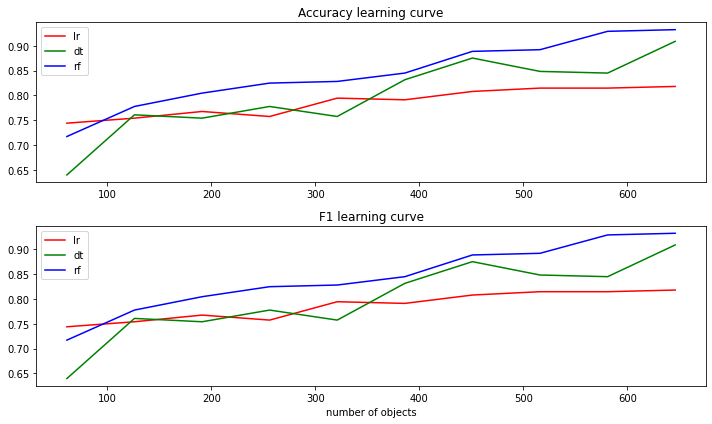

In [282]:
learning_curve()

As we can see from the plots above that metric values grows with size of train data. Best results have RF, LR has the lowest scores.